#### framework
- 준비된 상태

#### library
- 니가 알아서 써라

#### functional / class

# 파이썬에서 데이터분석을 위한 필수 Library

### [1] Pandas
- 2008년 금융데이터 분석용으로 출발 <br><br>
- 통계와 데이터 과학, 머신러닝에서 사용 <br><br>

### [2] Numpy
- 파이썬 기반 수치해석 Library <br><br>
- 선형대수 연산에 필요한 다차원 배열과 배열 연산을 수행하는 다양한 함수 제공 <br><br>

### [3] Matplotlib
- 그래프나 차트를 그래픽으로 표현하는 파이썬 도구 <br><br>

### [4] SciPy
- 과학용 연산에 필요한 다양한 패키지를 모아 놓은 Library <br><br>
- 미적분 , 선형대수 , 행렬연산 , 방정식 <br><br>
- deep learning이 나온 이후로는 많이 사용되지 않는다. <br><br>
- numpy를 가지고 만든 것이기 때문에 속도는 느리다.

### [5] scikit-learn
- 머신러닝 학습을 위한 파이썬 라이브러리 <br><br>
- 회귀분석(Regression) , 분류(Classification) , 군집(Clustering)

---
### DataFrame
- Pandas에서 사용하는 기본 데이터 <br><br>
- 데이터 프레임을 정의 할 때는 2차원 리스트를 매개변수로 전달 <br><br>

In [1]:
import pandas as pd

In [4]:
# list로 dataFrame 만들기
df = pd.DataFrame([
    [10,20,30],
    [40,50,60],
    [70,80,90]
])

df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [13]:
data1 = [10,20,30]
data2 = [40,50,60]
data3 = [70,80,90]

df = pd.DataFrame([data1,data2,data3])
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [24]:
# Dataframe에서 값 추출하기
# 열 기준으로 추출하기
df.loc[:,0]

0    10
1    40
2    70
Name: 0, dtype: int64

In [26]:
# 행 기준으로 추출하기
df.loc[0,]


,0,1
0,10,20
1,40,50
2,70,80


In [31]:
# 0번 열과 1번열 불러오기
df.loc[:,0:1]
df.loc[:,range(2)]

,0,1
0,10,20
1,40,50
2,70,80


In [32]:
# 특정 행의 열을 불러올 떄 
df.loc[1,1]

50

---
### Series
- 1차원 데이터

In [34]:
s = pd.Series([1.0,3.0,5.0,7.0,9.0])
s

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
dtype: float64

In [37]:
print(s[0])
print(s[0:3])

1.0
0    1.0
1    3.0
2    5.0
dtype: float64


---
### Dictionary로 data frame 만들기
- key값이 column이 되고, value list는 열 순위로 들어간다.

In [63]:
tbl = pd.DataFrame({
    'weight':[80.0,70.4,49.6,89.4,67.8],
    'height':[170,169,159,185,170],
    'type':['f','n','n','t','t']
})

tbl
type(tbl)

pandas.core.frame.DataFrame

In [57]:
# weight 컬럼만 출력하기
tbl.loc[:,'weight']

0    80.0
1    70.4
2    49.6
3    89.4
Name: weight, dtype: float64

In [58]:
# weight ,height 컬럼 출력하기
# column이름이 정해지게 되면 0,1,2 로 접근 불가능
tbl.loc[:,('weight','height')]


,weight,height
0,80.0,170
1,70.4,169
2,49.6,159
3,89.4,185


In [65]:
# 1,2번째 행 출력하기
print(tbl.loc[1:2,:])

# 2번째 이후의 행 출력하기
print(tbl.loc[2:,:])

   weight  height type
1    70.4     169    n
2    49.6     159    n
   weight  height type
2    49.6     159    n
3    89.4     185    t
4    67.8     170    t


### 행과 열기준이 아닌 Data를 비교해서 원하는 값만 추출
- loc 사용 시에는 행과열의 값이 모두 들어가야 된다. <br><br>
- dataFrame.columnName으로 접근하면 조건에 맞는 row만 가져오기가 편하다.

In [76]:
# True 인 값만 보여준다. 
tbl[[True, False, False, False, True]]

,weight,height,type
0,80.0,170,f
4,67.8,170,t


In [80]:
# 키가 160 이상인 Data를 출력하자
# loc 사용하지 않고 df.columnName 으로 전부 가져올 수 있다. 
tbl[tbl.height >= 160]

,weight,height,type
0,80.0,170,f
1,70.4,169,n
3,89.4,185,t
4,67.8,170,t


In [73]:
# type이 n인 것만 출력하기
tbl[tbl.type == 'n']

,weight,height,type
1,70.4,169,n
2,49.6,159,n


---
### 정렬의 오름차순과 내림차순

In [82]:
# height를 기준으로 오름 차순
tbl.sort_values(by='height')

,weight,height,type
2,49.6,159,n
1,70.4,169,n
0,80.0,170,f
4,67.8,170,t
3,89.4,185,t


In [83]:
# height를 기준으로 내림 차순
tbl.sort_values(by='height',ascending=False)

,weight,height,type
3,89.4,185,t
0,80.0,170,f
4,67.8,170,t
1,70.4,169,n
2,49.6,159,n


In [84]:
# 방향 전환
tbl.T

,0,1,2,3,4
weight,80.0,70.4,49.6,89.4,67.8
height,170,169,159,185,170
type,f,n,n,t,t


---
### Numpy를 이용한 데이터 조작

In [85]:
import numpy as np

In [92]:
# 10개의 0으로 된 float32 자료형 데이터 생성
np01 = np.zeros(10,dtype=np.float32)
np01

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [91]:
# 10개의 1으로 된 float32 자료형 데이터 생성
np02 = np.ones(10,dtype=np.float32)
np02

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [96]:
# 10개의 연속된 uint64(양수의 int 64비트라는 말)
np03 = np.arange(10,dtype=np.uint64)
np03

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [99]:
# 3의 배수만 필요할 때면
np04 = np.arange(10,dtype=np.uint64) * 3
np04

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27], dtype=uint64)

In [101]:
# np04의 평균 구하기
np.mean(np04)

13.5

In [102]:
# np04의 합계 구하기
np.sum(np04)

135

In [104]:
# np04의 중앙값 구하기
np.median(np04)

13.5

In [105]:
# np04의 분산 구하기
np.var(np04)

74.25

In [106]:
# np04의 표준편차 구하기
np.std(np04)

8.616843969807043

In [108]:
# 분산에 제곱근을 구하면 표준편차인가? 그렇다.
np.sqrt(np.var(np04)) == np.std(np04)

True

In [110]:
# 표준편차에 제곱을 하면 분산인가? 그렇다.
np.power(np.std(np04),2) == np.var(np04)

True

In [116]:
# dataFrame을 행렬로 변환하기
tbl.values

array([[80.0, 170, 'f'],
       [70.4, 169, 'n'],
       [49.6, 159, 'n'],
       [89.4, 185, 't'],
       [67.8, 170, 't']], dtype=object)

---
### Pandas와 Matplotlib을 이용한 시각화

In [117]:
#!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.7 MB/s eta 0:00:00


In [132]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [119]:
names = pd.read_csv('../Data/Baby_Names_1880-2014.csv') # header = 0 (있음 , default) , = 1 (없음)
names.head()

,name,gender,births,year,id
0,Mary,F,7065,1880,1
1,Anna,F,2604,1880,2
2,Emma,F,2003,1880,3
3,Elizabeth,F,1939,1880,4
4,Minnie,F,1746,1880,5


In [120]:
names.tail()

,name,gender,births,year,id
1825383,Zykeem,M,5,2014,13973
1825384,Zymeer,M,5,2014,13974
1825385,Zymiere,M,5,2014,13975
1825386,Zyran,M,5,2014,13976
1825387,Zyrin,M,5,2014,13977


In [121]:
# 앞에 10개 보기
names.head(10)

,name,gender,births,year,id
0,Mary,F,7065,1880,1
1,Anna,F,2604,1880,2
2,Emma,F,2003,1880,3
3,Elizabeth,F,1939,1880,4
4,Minnie,F,1746,1880,5
5,Margaret,F,1578,1880,6
6,Ida,F,1472,1880,7
7,Alice,F,1414,1880,8
8,Bertha,F,1320,1880,9
9,Sarah,F,1288,1880,10


In [122]:
# 전체 갯수
names.count()

name      1825388
gender    1825388
births    1825388
year      1825388
id        1825388
dtype: int64

In [123]:
# 컬럼 하나의 갯수
names.gender.count()

1825388

In [124]:
# pivot을 이용하여 각 이름의 count를 년도별 합계로 그룹화 하여 집계하기
# births를 합칠건데 year로 그룹을 지은다음에 gender로 합친것을 나눌 것이라는 말
total_births = names.pivot_table('births',index='year',columns='gender',aggfunc=sum)
total_births

gender,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113683
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


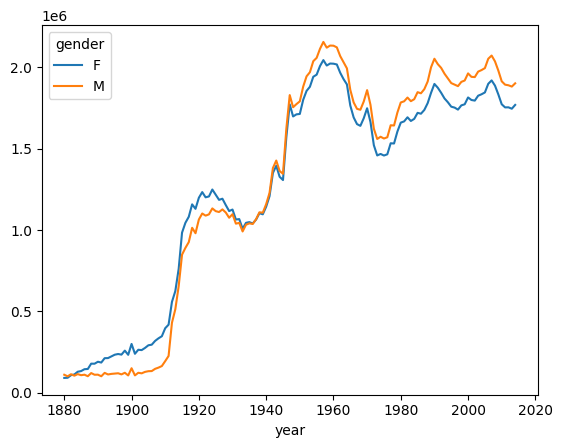

In [134]:
total_births.plot()
plt.show()

In [138]:
# 그래프의 가로 세로 비율 적용
plt.rcParams['figure.figsize'] = (14,6)

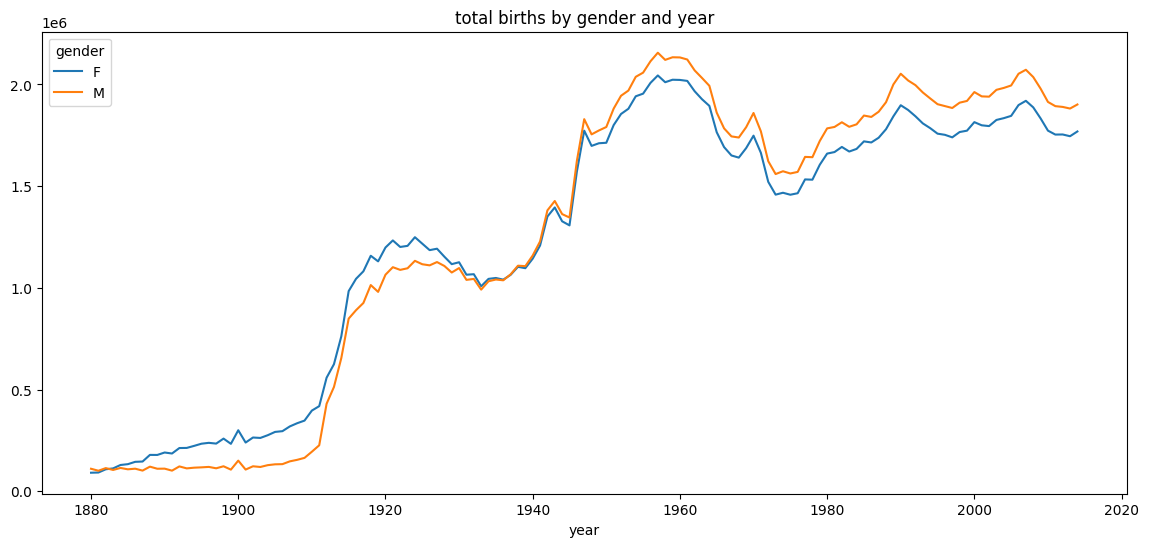

In [141]:
total_births.plot(title='total births by gender and year')
plt.show()

In [144]:
# name, gender, birtys, year 만으로 새로운 csv 저장하기
name2 = pd.DataFrame({
    'name' : names['name'],
    'gender' : names['gender'],
    'births' : names['births'],
    'year' : names['year']
})

name2.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [145]:
name2.to_csv('../Data/birth_names.csv',index=False,encoding='utf-8',header=True)

In [146]:
pd.read_csv('../Data/birth_names.csv')


,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1825383,Zykeem,M,5,2014
1825384,Zymeer,M,5,2014
1825385,Zymiere,M,5,2014
1825386,Zyran,M,5,2014
